This project is based on a regression task of predicting house prices based on a number of features.
The project will invlolve reading in data, exploratory data analysis, data preprocessing, neural network model creation, model training and model evaluation.

In [38]:
# Import modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Read in the data.
df = pd.read_csv('kc_house_data.csv')

The intention at this stage is to explore the data. We want to get as much of an understanding of the data as possible, see correlations between inputs and the intended predicted output, and to view the type of data included in the dataframe in case we need to drop or engineer features.

In [40]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [41]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [42]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Initial viewing through the head(), describe() and the sum of isnull() show us some useful information. We can see the features within the dataframe and see the type of data under these features. We can see the mean price of houses and the max/min price of houses and we see there are no missing data entries. We get an early idea of features we may decide to drop, or engineer later. Next we will begin to explore the data through visualization. Price is what we are trying to predict so let's begin with checking the distribution of price.

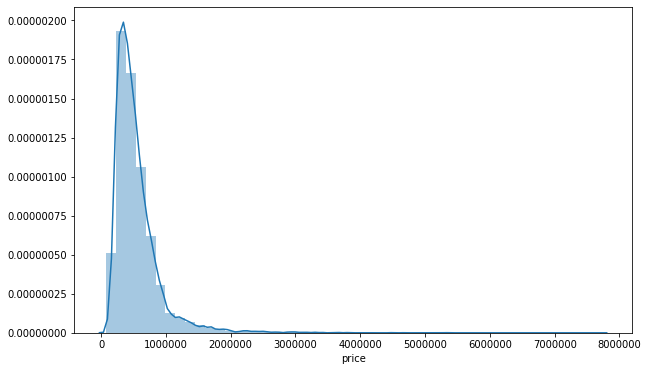

In [43]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

We see the majority of house prices are under $1,000,000 but also there are some outliers in the high millions.
The presence of such outliers may skew results in our model prediction later.
There are a few more features that could directly affect price that we can explore.

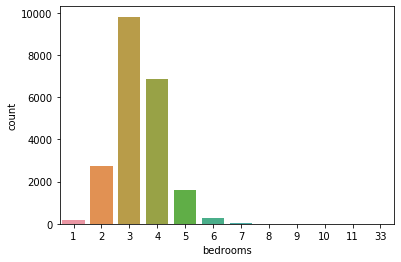

In [44]:
sns.countplot(df['bedrooms'])

We see distribution of bedrooms averages around 3-4. We can check if there are any high correlations between our label and the features for more information.

In [45]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

We can see there's a low enough correlation between bedrooms and house price. There is a high correlation between sqft_living and price so we will view this in more detail.

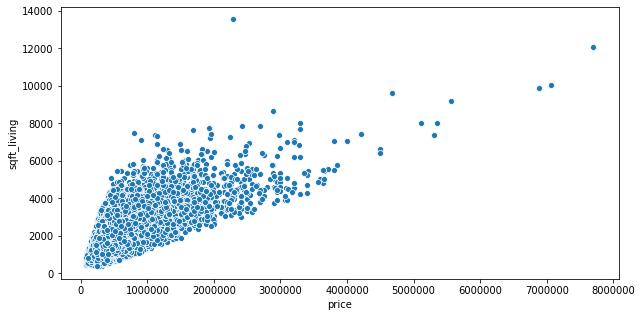

In [46]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living', data=df)

The next stage we move on to is cleaning up the data and deciding on what to include or exclude. We can see from the head() again the features within our dataframe and get more information from the info().

In [47]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The first obvious feature to drop here is 'id'. We can also see that 'date' is a string rather than a datetime type so isn't of much use to us. We can feature engineer that if we change it to a datetime type.The 'zipcode' may be useful or may not, and 'yr_renovated' is another feature that may or may not cause issues. We will move on and review later.

In [49]:
# Drop the id feature
df = df.drop('id',axis=1)

In [50]:
# Change the date to datetime type, and extract year and month as engineered features.
df['date']= pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [51]:
# Check the head again to ensure the new features are included.
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


We can quickly check if there is correlation to price by year of house sale before progressing.

In [52]:
df.corr()['price'].sort_values()

zipcode         -0.053402
month           -0.009928
year             0.003727
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

We can see very poor correlation to price. We can also drop the original date feature now as we have month and year features.

In [53]:
df = df.drop('date', axis=1)

In [54]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10


In [55]:
# Drop the zipcode feature
df = df.drop('zipcode', axis=1)

At this stage we begin to preprocess the data and create a model.

In [56]:
X = df.drop('price', axis=1).values #Assign all features left except price to X
y = df['price'].values #Assign price to y (our label)

In [57]:
# Import the module and split the data into train and test components.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=101)

The next thing we want to do is scale the data because of the large varience in magnatude across the features. We do this after the train/test split because we only want to fit to the training set to prevent data leakage from the test set.

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_test= scaler.transform(X_test)

In [59]:
# Create the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

We now want to decide on the number of neurons to have in our layers and do this based on the size of our data. We can check this with shape.

In [60]:
X_train.shape

(15117, 19)

In [61]:
# Create the model.
# 4 layers of 19.
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
# Output neuron
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [72]:
model.fit(x = X_train, y = y_train, batch_size=128,epochs=600)

Epoch 1/600
15117/15117 [==============================] - 0s 7us/sample - loss: 29407414253.5752
Epoch 2/600
15117/15117 [==============================] - 0s 7us/sample - loss: 29484146319.1649
Epoch 3/600
15117/15117 [==============================] - 0s 7us/sample - loss: 29423393421.7424
Epoch 4/600
15117/15117 [==============================] - 0s 7us/sample - loss: 29399948387.9140
Epoch 5/600
15117/15117 [==============================] - 0s 7us/sample - loss: 29382004661.8266
Epoch 6/600
15117/15117 [==============================] - 0s 7us/sample - loss: 29392616244.1754
Epoch 7/600
15117/15117 [==============================] - 0s 6us/sample - loss: 29402633506.9022
Epoch 8/600
15117/15117 [==============================] - 0s 7us/sample - loss: 29363413938.9815
Epoch 9/600
15117/15117 [==============================] - 0s 6us/sample - loss: 29358533366.1271
Epoch 10/600
15117/15117 [==============================] - 0s 7us/sample - loss: 29333561839.3025
Epoch 11/600
15117/

15117/15117 [==============================] - 0s 7us/sample - loss: 28744353635.6600
Epoch 84/600
15117/15117 [==============================] - 0s 7us/sample - loss: 28706606873.5881
Epoch 85/600
15117/15117 [==============================] - 0s 7us/sample - loss: 28678343240.5816
Epoch 86/600
15117/15117 [==============================] - 0s 7us/sample - loss: 28707510530.7603
Epoch 87/600
15117/15117 [==============================] - 0s 7us/sample - loss: 28681095040.7875
Epoch 88/600
15117/15117 [==============================] - 0s 7us/sample - loss: 28677028989.8578
Epoch 89/600
15117/15117 [==============================] - 0s 7us/sample - loss: 28668537507.3509
Epoch 90/600
15117/15117 [==============================] - 0s 6us/sample - loss: 28664206524.7867
Epoch 91/600
15117/15117 [==============================] - 0s 7us/sample - loss: 28659540574.1224
Epoch 92/600
15117/15117 [==============================] - 0s 7us/sample - loss: 28677901059.8103
Epoch 93/600
15117/1511

15117/15117 [==============================] - 0s 7us/sample - loss: 28023569467.6774
Epoch 166/600
15117/15117 [==============================] - 0s 7us/sample - loss: 27974572901.4889
Epoch 167/600
15117/15117 [==============================] - 0s 7us/sample - loss: 27957963839.8772
Epoch 168/600
15117/15117 [==============================] - 0s 7us/sample - loss: 27931959237.9144
Epoch 169/600
15117/15117 [==============================] - 0s 7us/sample - loss: 27928486076.8544
Epoch 170/600
15117/15117 [==============================] - 0s 7us/sample - loss: 27920434588.7295
Epoch 171/600
15117/15117 [==============================] - 0s 7us/sample - loss: 27915497994.0591
Epoch 172/600
15117/15117 [==============================] - 0s 7us/sample - loss: 27885165775.8889
Epoch 173/600
15117/15117 [==============================] - 0s 7us/sample - loss: 27894257979.1186
Epoch 174/600
15117/15117 [==============================] - 0s 7us/sample - loss: 27879540940.9761
Epoch 175/600


15117/15117 [==============================] - 0s 7us/sample - loss: 27339290521.7152
Epoch 248/600
15117/15117 [==============================] - 0s 7us/sample - loss: 27451616010.2454
Epoch 249/600
15117/15117 [==============================] - 0s 7us/sample - loss: 27312594995.4134
Epoch 250/600
15117/15117 [==============================] - 0s 7us/sample - loss: 27259694101.5408
Epoch 251/600
15117/15117 [==============================] - 0s 7us/sample - loss: 27302011622.0054
Epoch 252/600
15117/15117 [==============================] - 0s 7us/sample - loss: 27268886085.1947
Epoch 253/600
15117/15117 [==============================] - 0s 7us/sample - loss: 27268350385.3897
Epoch 254/600
15117/15117 [==============================] - 0s 7us/sample - loss: 27268805926.7294
Epoch 255/600
15117/15117 [==============================] - 0s 7us/sample - loss: 27276589702.0880
Epoch 256/600
15117/15117 [==============================] - 0s 6us/sample - loss: 27235799947.8288
Epoch 257/600


15117/15117 [==============================] - 0s 7us/sample - loss: 26877312372.6962
Epoch 330/600
15117/15117 [==============================] - 0s 6us/sample - loss: 26882746397.3984
Epoch 331/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26879809857.3505
Epoch 332/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26904584344.7160
Epoch 333/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26871476180.9184
Epoch 334/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26936230927.9185
Epoch 335/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26939462354.4968
Epoch 336/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26828129720.2313
Epoch 337/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26872646918.3505
Epoch 338/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26899571845.6477
Epoch 339/600


15117/15117 [==============================] - 0s 7us/sample - loss: 26577716065.9665
Epoch 412/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26630589120.9526
Epoch 413/600
15117/15117 [==============================] - 0s 6us/sample - loss: 26578129622.6966
Epoch 414/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26605170244.5850
Epoch 415/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26547965788.9539
Epoch 416/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26548505021.5826
Epoch 417/600
15117/15117 [==============================] - 0s 6us/sample - loss: 26596367652.4263
Epoch 418/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26595597379.5351
Epoch 419/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26561037194.9482
Epoch 420/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26607765589.6212
Epoch 421/600


15117/15117 [==============================] - 0s 7us/sample - loss: 26474113948.5602
Epoch 494/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26460687815.4046
Epoch 495/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26433804919.4565
Epoch 496/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26437466766.9617
Epoch 497/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26459794925.5413
Epoch 498/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26455170273.8395
Epoch 499/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26417914674.0078
Epoch 500/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26396511650.6905
Epoch 501/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26456745113.2241
Epoch 502/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26426780991.0813
Epoch 503/600


15117/15117 [==============================] - 0s 7us/sample - loss: 26254061161.5702
Epoch 576/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26338309285.3492
Epoch 577/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26344838150.0287
Epoch 578/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26324411966.8273
Epoch 579/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26337121571.2070
Epoch 580/600
15117/15117 [==============================] - 0s 6us/sample - loss: 26315325433.8697
Epoch 581/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26339765551.8063
Epoch 582/600
15117/15117 [==============================] - 0s 6us/sample - loss: 26298521173.6551
Epoch 583/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26312772912.4837
Epoch 584/600
15117/15117 [==============================] - 0s 7us/sample - loss: 26346560608.2561
Epoch 585/600


The neural network model is now trained. We set it up as a deep neural network with a 19 neuron input layer, three 19 neuron hidden layers and a single neuron output layer. We also ran the data through the network 600 times as set by epochs=600. The activation function we used was the rectified linear unit(relu) and the loss function was mean square error, the optimizer was adam. The next stage would be to test the performance of the model and to then get it to predict a price from information it has not seen.